## Module 2 Assignment 2: House Prices: Advanced Regression Techniques EDA 

### I. EDA -Set up

In [982]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from scipy.stats import shapiro
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [869]:
df_train = pd.read_csv("train-2.csv")
train = pd.read_csv("train-2.csv")
x_testset = pd.read_csv("test.csv")

### II. EDA - Data Wrangling

In [870]:
df_train.info() #Need to Drop the columns with more null value row
df_train.shape
df_train.head()
df_trainID = df_train['Id']
x_testID = x_testset['Id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [871]:
df_train = pd.concat((df_train,x_testset),ignore_index=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [872]:
df2_train = df_train.drop(columns=['LotFrontage',
                                   'Alley',
                                   'FireplaceQu',
                                  'PoolQC',
                                  'Fence',
                                  'MiscFeature'])
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

#### 1. Explore Numerical variable -selecting feature with correlation method

In [873]:
df_nv_train = df2_train.select_dtypes(exclude=['object']) #find all numerical variables
df_nv_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
2915,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
2916,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
2917,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,-0.011702,0.260155,-0.020854,-0.159325,-0.086700,-0.137614,-0.142431,-0.051389,-0.086354,-0.037779,...,-0.087399,-0.068181,0.027639,-0.021462,-0.056573,-0.013116,0.025078,0.035493,0.035173,-0.135907
EnclosedPorch,0.021609,-0.020867,0.020974,-0.139256,0.071044,-0.374073,-0.220456,-0.111499,-0.099712,0.032740,...,-0.119114,-0.059672,1.000000,-0.032822,-0.064377,0.092534,0.008654,-0.020976,-0.001134,-0.128578
MSSubClass,0.008931,1.000000,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
OverallCond,-0.002839,-0.065625,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YrSold,-0.256050,-0.015028,-0.024234,-0.019614,0.030102,-0.012344,0.033203,-0.018510,0.022556,0.008883,...,-0.000180,-0.037377,-0.001134,0.022560,-0.006634,-0.052816,0.008445,-0.153895,1.000000,-0.028923
LowQualFinSF,-0.037816,0.026482,0.000554,-0.048393,0.009048,-0.144191,-0.060371,-0.057912,-0.066028,-0.004923,...,-0.015622,-0.000692,0.087212,-0.004545,0.006835,0.035177,-0.005973,0.011528,-0.002257,-0.025606
Id,1.000000,0.008931,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MiscVal,0.008244,-0.028867,0.069029,0.005562,0.033956,-0.010886,-0.003124,0.044811,0.093295,-0.005139,...,0.056883,0.077357,0.008654,-0.000788,0.007067,0.011921,1.000000,0.007443,0.008445,-0.021190
BsmtHalfBath,0.010387,-0.001878,0.026292,-0.040732,0.084181,-0.030282,-0.046285,0.015006,0.078361,0.099485,...,0.051549,-0.034917,-0.009675,0.026861,0.042069,0.066851,0.036902,0.023014,-0.020028,-0.016844
BsmtFinSF2,0.018251,-0.072530,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,...,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883,-0.011378


<AxesSubplot:>

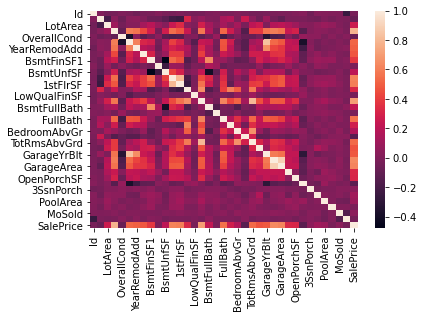

In [874]:
cormat = df_nv_train.corr()
sorted_mat = cormat.sort_values("SalePrice")
sorted_mat
sns.heatmap(cormat) #from the correlation chart, numerical 

In [881]:
n_selFeature = df2_train[[#'LotArea',
                        # 'HalfBath',
                        #'OpenPorchSF',
                        #'2ndFlrSF',
                         # 'WoodDeckSF',
                         #'BsmtFinSF1',
                         #'Fireplaces',
                        # 'MasVnrArea',
                        # 'GarageYrBlt',
                         'YearRemodAdd',
                         'YearBuilt',
                         'TotRmsAbvGrd',
                         'FullBath',
                         '1stFlrSF',
                         'TotalBsmtSF',
                         'GarageArea',
                         'GarageCars',
                         'GrLivArea',                         
                         'OverallQual',
                         'SalePrice']].copy()
#'3SsnPorch',
 #                         'MoSold',
 ##                         'PoolArea',
 #                         'ScreenPorch',
 #                         'BedroomAbvGr',
 #                         'BsmtUnfSF',
 #                         'BsmtFullBath',
#'LotArea',
 #                        'HalfBath',
 #                        'OpenPorchSF',
 #                        '2ndFlrSF',
n_selFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  2919 non-null   int64  
 1   YearBuilt     2919 non-null   int64  
 2   TotRmsAbvGrd  2919 non-null   int64  
 3   FullBath      2919 non-null   int64  
 4   1stFlrSF      2919 non-null   int64  
 5   TotalBsmtSF   2918 non-null   float64
 6   GarageArea    2918 non-null   float64
 7   GarageCars    2918 non-null   float64
 8   GrLivArea     2919 non-null   int64  
 9   OverallQual   2919 non-null   int64  
 10  SalePrice     1460 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 251.0 KB


#### Missing value fillin and outliers & skewness handling

In [882]:
#filling na value with mode in selected features
#n_selFeature['MasVnrArea'].fillna(n_selFeature['MasVnrArea'].mode()[0], inplace=True)
n_selFeature['GarageArea'].fillna(n_selFeature['GarageArea'].mode()[0], inplace=True)
n_selFeature['GarageCars'].fillna(n_selFeature['GarageCars'].mode()[0], inplace=True)
n_selFeature['TotalBsmtSF'].fillna(n_selFeature['TotalBsmtSF'].mode()[0], inplace=True)
#n_selFeature['GarageYrBlt'].fillna(n_selFeature['GarageYrBlt'].mode()[0], inplace=True)
#n_selFeature['BsmtUnfSF'].fillna(n_selFeature['BsmtUnfSF'].mode()[0], inplace=True)
#n_selFeature['BsmtFullBath'].fillna(n_selFeature['BsmtFullBath'].mode()[0], inplace=True)
#n_selFeature['BsmtFinSF1'].fillna(n_selFeature['BsmtFinSF1'].mode()[0], inplace=True)
#n_selFeature.info()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1984.264474,1971.312778,6.451524,1.568003,1159.581706,1051.417266,472.712573,1.766701,1500.759849,6.089072,180921.195890
std,20.894344,30.291442,1.569379,0.552969,392.362079,441.120498,215.535686,0.761506,506.051045,1.409947,79442.502883
min,1950.000000,1872.000000,2.000000,0.000000,334.000000,0.000000,0.000000,0.000000,334.000000,1.000000,34900.000000
25%,1965.000000,1953.500000,5.000000,1.000000,876.000000,793.000000,320.000000,1.000000,1126.000000,5.000000,129975.000000
50%,1993.000000,1973.000000,6.000000,2.000000,1082.000000,989.000000,480.000000,2.000000,1444.000000,6.000000,163000.000000
75%,2004.000000,2001.000000,7.000000,2.000000,1387.500000,1302.000000,576.000000,2.000000,1743.500000,7.000000,214000.000000
max,2010.000000,2010.000000,15.000000,4.000000,5095.000000,6110.000000,1488.000000,5.000000,5642.000000,10.000000,755000.000000


<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='SalePrice'>

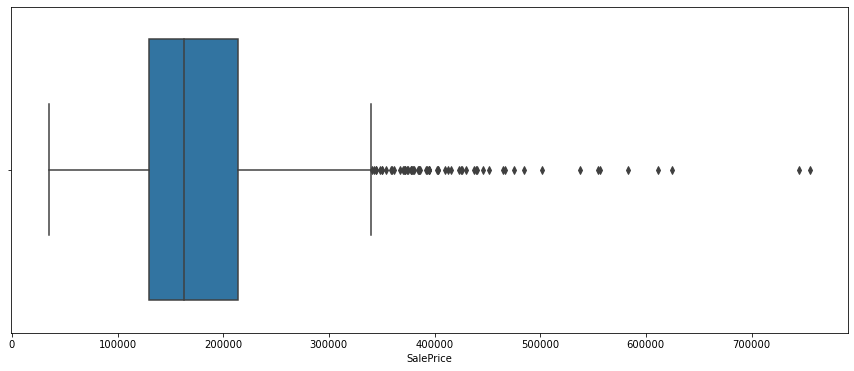

In [883]:
n_selFeature.describe()
plt.figure(figsize = (15,6))
sns.boxplot(x=n_selFeature['SalePrice']) #looking for the outlier in sale price

84025.0

3937.5

256012.5

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

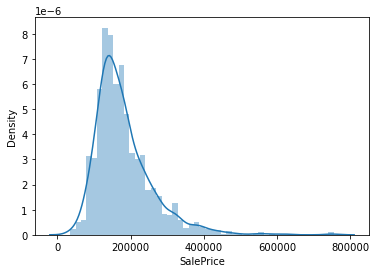

In [884]:
Q1=n_selFeature['SalePrice'].quantile(0.25)
Q3=n_selFeature['SalePrice'].quantile(0.75)
IQR = Q3-Q1
IQR

LTV = Q1 - 1.5*IQR
UTV = Q1 + 1.5*IQR

LTV
UTV

#n_selFeature.drop(n_selFeature[n_selFeature['SalePrice'] > 256012.5 ].index, inplace = True)

#n_features = n_selFeature.loc[n_selFeature['SalePrice'] < 256012.5]
#new dataframe n_features without sale price outliers
n_features = n_selFeature.copy()
sns.distplot(n_features['SalePrice'])

In [885]:
#checking skewness of selected features
skew = n_features.skew().sort_values(ascending = False)
skew

SalePrice       1.882876
1stFlrSF        1.470360
GrLivArea       1.270010
TotalBsmtSF     1.157489
TotRmsAbvGrd    0.758757
GarageArea      0.239380
OverallQual     0.197212
FullBath        0.167692
GarageCars     -0.218705
YearRemodAdd   -0.451252
YearBuilt      -0.600114
dtype: float64

In [886]:
#n_features['LotArea'] = np.log(n_features['LotArea'])
#n_features['MasVnrArea'] = np.log(n_features['MasVnrArea'])
#n_features['OpenPorchSF'] = np.log(n_features['OpenPorchSF'])
#n_features['PoolArea'] = np.log(n_features['PoolArea'])
#n_features['3SsnPorch'] = np.log(n_features['3SsnPorch'])
#n_features['LotArea']
skew = n_features.skew().sort_values(ascending = False)
skew

SalePrice       1.882876
1stFlrSF        1.470360
GrLivArea       1.270010
TotalBsmtSF     1.157489
TotRmsAbvGrd    0.758757
GarageArea      0.239380
OverallQual     0.197212
FullBath        0.167692
GarageCars     -0.218705
YearRemodAdd   -0.451252
YearBuilt      -0.600114
dtype: float64

From the correlation chart of selected numerical variables, the overall quality,general Living Area, GarageCars numbers, total basement area are very related to sales price.  

#### 2. Categorical Variables

In [887]:
c_selfeature = df2_train.select_dtypes(include=['object']) 
#find all categorical variables
c_selfeature['SalePrice']= n_selFeature['SalePrice']
c_selfeature.head()
c_selfeature.info()

<ipython-input-887-3641f8e607cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_selfeature['SalePrice']= n_selFeature['SalePrice']


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   Street         2919 non-null   object 
 2   LotShape       2919 non-null   object 
 3   LandContour    2919 non-null   object 
 4   Utilities      2917 non-null   object 
 5   LotConfig      2919 non-null   object 
 6   LandSlope      2919 non-null   object 
 7   Neighborhood   2919 non-null   object 
 8   Condition1     2919 non-null   object 
 9   Condition2     2919 non-null   object 
 10  BldgType       2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  RoofStyle      2919 non-null   object 
 13  RoofMatl       2919 non-null   object 
 14  Exterior1st    2918 non-null   object 
 15  Exterior2nd    2918 non-null   object 
 16  MasVnrType     2895 non-null   object 
 17  ExterQual      2919 non-null   object 
 18  ExterCon

In [888]:
cat_null = ['MSZoning','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','Exterior1st','Exterior2nd', 'GarageType','GarageFinish','GarageQual','GarageCond','Functional','KitchenQual','SaleType']
for col in cat_null:
    c_selfeature[col].fillna(c_selfeature[col].mode()[0], inplace=True)

c_selfeature.info()

#for col in cat_null:
    #c_selfeature[col].fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2919 non-null   object 
 1   Street         2919 non-null   object 
 2   LotShape       2919 non-null   object 
 3   LandContour    2919 non-null   object 
 4   Utilities      2919 non-null   object 
 5   LotConfig      2919 non-null   object 
 6   LandSlope      2919 non-null   object 
 7   Neighborhood   2919 non-null   object 
 8   Condition1     2919 non-null   object 
 9   Condition2     2919 non-null   object 
 10  BldgType       2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  RoofStyle      2919 non-null   object 
 13  RoofMatl       2919 non-null   object 
 14  Exterior1st    2919 non-null   object 
 15  Exterior2nd    2919 non-null   object 
 16  MasVnrType     2919 non-null   object 
 17  ExterQual      2919 non-null   object 
 18  ExterCon

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


#### One hot encoding on nominal variables and ordinal coding for ordinal variables

In [896]:
nominal_var = ['MSZoning', 
               'Street', 
               'LotShape', 
               'LandContour', 
               'Utilities', 
               'LotConfig', 
               'LandSlope', 
               'Neighborhood', 
               'Condition1', 
               'Condition2', 
               'BldgType', 
               'HouseStyle', 
               'RoofStyle', 
               'RoofMatl', 
               'Exterior1st', 
               'Exterior2nd', 
               'MasVnrType', 
               'Foundation', 
               'Heating', 
               'Functional', 
               'GarageType', 
               'SaleType', 
               'SaleCondition']
ordinal_var = ['ExterQual', 
               'ExterCond', 
               'BsmtQual', 
               'BsmtCond', 
               'BsmtExposure', 
               'BsmtFinType1', 
               'BsmtFinType2', 
               'HeatingQC', 
               'CentralAir', 
               'Electrical', 
               'KitchenQual', 
               'GarageFinish', 
               'GarageQual', 
               'GarageCond', 
               'PavedDrive']



In [897]:
one_hot = pd.get_dummies(c_selfeature[nominal_var])
one_hot #nominal variables encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2915,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2916,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2917,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [891]:
ordinalencoder = OrdinalEncoder()
ordinalencod = ordinalencoder.fit_transform(c_selfeature[ordinal_var])
ordinalencod
ordi_encode = pd.DataFrame(ordinalencod, columns = [ordinal_var])
ordi_encode
ordi_encode.columns = ['ExterQual', 
               'ExterCond', 
               'BsmtQual', 
               'BsmtCond', 
               'BsmtExposure', 
               'BsmtFinType1', 
               'BsmtFinType2', 
               'HeatingQC', 
               'CentralAir', 
               'Electrical', 
               'KitchenQual', 
               'GarageFinish', 
               'GarageQual', 
               'GarageCond', 
               'PavedDrive']#ordinal variable encoded

array([[2., 4., 2., ..., 4., 4., 2.],
       [3., 4., 2., ..., 4., 4., 2.],
       [2., 4., 2., ..., 4., 4., 2.],
       ...,
       [3., 4., 3., ..., 4., 4., 2.],
       [3., 4., 2., ..., 4., 4., 2.],
       [3., 4., 2., ..., 4., 4., 2.]])

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,2.0,4.0,2.0,3.0,3.0,2.0,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
1,3.0,4.0,2.0,3.0,1.0,0.0,5.0,0.0,1.0,4.0,3.0,1.0,4.0,4.0,2.0
2,2.0,4.0,2.0,3.0,2.0,2.0,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
3,3.0,4.0,3.0,1.0,3.0,0.0,5.0,2.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0
4,2.0,4.0,2.0,3.0,0.0,2.0,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.0,4.0,3.0,3.0,3.0,5.0,5.0,2.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0
2915,3.0,4.0,3.0,3.0,3.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0
2916,3.0,4.0,3.0,3.0,3.0,0.0,5.0,0.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0
2917,3.0,4.0,2.0,3.0,0.0,2.0,5.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0


In [898]:
#c_featuresel = pd.concat([one_hot, ordi_encode,n_selFeature['SalePrice']], axis=1, join="inner")
#indexNames = c_featuresel[c_featuresel['SalePrice'] > 256012.5 ].index
#c_features = c_featuresel.drop(indexNames, inplace = True)
c_features = c_featuresel.copy()
#c_feature = c_features.drop(columns = ['SalePrice'])

In [899]:
c_features

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,208500.0
1,0,0,0,1,0,0,1,0,0,0,...,5.0,0.0,1.0,4.0,3.0,1.0,4.0,4.0,2.0,181500.0
2,0,0,0,1,0,0,1,1,0,0,...,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,223500.0
3,0,0,0,1,0,0,1,1,0,0,...,5.0,2.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,140000.0
4,0,0,0,1,0,0,1,1,0,0,...,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,0,1,0,1,0,0,0,...,5.0,2.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0,NaN
2915,0,0,0,0,1,0,1,0,0,0,...,5.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0,NaN
2916,0,0,0,1,0,0,1,0,0,0,...,5.0,0.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0,NaN
2917,0,0,0,1,0,0,1,0,0,0,...,5.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0,NaN


In [900]:
c_feature = c_features.drop(columns = ['SalePrice'])

Feature selection for categorical variables

In [901]:
x=c_features.iloc[:1200,:-1]  #Independent variable
y=c_features.iloc[:1200,-1]   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
#f_score
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
p_value
p_value.nlargest(150)
p_value.nsmallest(33)

SaleType_Con            4.944048e-61
Condition2_PosN         4.944048e-61
Condition2_RRAn         4.944048e-61
Heating_Floor           4.944048e-61
SaleCondition_Alloca    7.157840e-50
                            ...     
Foundation_Wood         1.000000e+00
PavedDrive              1.000000e+00
Condition2_PosA                  NaN
Exterior1st_ImStucc              NaN
Exterior2nd_Other                NaN
Length: 184, dtype: float64

MasVnrType_None         1.000000
SaleType_WD             1.000000
LotConfig_Inside        1.000000
Utilities_NoSeWa        1.000000
Utilities_AllPub        1.000000
                          ...   
Foundation_Stone        0.022203
Neighborhood_CollgCr    0.020418
LandSlope_Sev           0.006386
Exterior2nd_Stucco      0.003837
Exterior2nd_BrkFace     0.003057
Length: 150, dtype: float64

SaleType_Con             4.944048e-61
Condition2_PosN          4.944048e-61
Condition2_RRAn          4.944048e-61
Heating_Floor            4.944048e-61
SaleCondition_Alloca     7.157840e-50
HeatingQC                3.964981e-43
Heating_Wall             1.549390e-29
MSZoning_C (all)         1.432102e-22
LotConfig_FR3            5.081873e-22
SaleType_New             3.785440e-20
Neighborhood_Veenker     2.008025e-18
SaleCondition_Partial    3.412433e-18
Foundation_Slab          1.924816e-13
Street_Grvl              2.404679e-11
Neighborhood_NridgHt     2.483394e-11
MSZoning_FV              2.073139e-10
Neighborhood_Somerst     5.964673e-10
SaleType_Oth             2.456982e-09
Neighborhood_Blmngtn     1.002416e-08
Heating_Grav             4.472732e-08
BsmtFinType1             4.425353e-07
Condition2_RRNn          6.394172e-07
HouseStyle_2.5Fin        3.417998e-06
Neighborhood_NoRidge     4.142374e-06
RoofStyle_Gambrel        2.790773e-05
Neighborhood_IDOTRR      3.533603e-05
Exterior2nd_

For basement feature, the Basement has feature: BsmtFinSF1 (Type1 finished squarefeet), BsmtFinSF2 (Type2 finished squarefeet), BsmtUnfSF(unfinished basement squarefeet), TotalBsmtSF (total basement finish area).In here, the four variables are explaining each other so that adding unfinished ratio and delete the four features.

In [629]:
df_basement = df2_train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].copy()

In [630]:
df_basement['unfinish_ratio'] = (df_basement['BsmtUnfSF']/df_basement['TotalBsmtSF']).round(1)
df_basement.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice,unfinish_ratio
0,706.0,0.0,150.0,856.0,208500.0,0.2
1,978.0,0.0,284.0,1262.0,181500.0,0.2
2,486.0,0.0,434.0,920.0,223500.0,0.5
3,216.0,0.0,540.0,756.0,140000.0,0.7
4,655.0,0.0,490.0,1145.0,250000.0,0.4


Using the unfinished area divde total basement area, came up with unfinished basement area ratio.
The relationship between sale price and unfinish ratio is not very clear, even though it seems
the lower ratio would sale with higher price, and unfinished basement has most sales 468 houses sold.

4. Scaling

In [902]:
numerical_features = n_features.drop(columns = ['SalePrice'])
final = pd.concat([numerical_features, c_feature], axis = 'columns')
final

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,...,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,2003,2003,8,2,856,856.0,548.0,2.0,1710,7,...,2.0,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
1,1976,1976,6,2,1262,1262.0,460.0,2.0,1262,6,...,0.0,5.0,0.0,1.0,4.0,3.0,1.0,4.0,4.0,2.0
2,2002,2001,6,2,920,920.0,608.0,2.0,1786,7,...,2.0,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
3,1970,1915,7,1,961,756.0,642.0,3.0,1717,7,...,0.0,5.0,2.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0
4,2000,2000,9,2,1145,1145.0,836.0,3.0,2198,8,...,2.0,5.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1970,1970,5,1,546,546.0,0.0,0.0,1092,4,...,5.0,5.0,2.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0
2915,1970,1970,6,1,546,546.0,286.0,1.0,1092,4,...,4.0,5.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0
2916,1996,1960,7,1,1224,1224.0,576.0,2.0,1224,5,...,0.0,5.0,0.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0
2917,1992,1992,6,1,970,912.0,0.0,0.0,970,5,...,2.0,5.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0


In [847]:
final1 = np.nan_to_num(final)

In [904]:
#apply standard scaling on categorical variables
scaler = MinMaxScaler()
final_train = pd.DataFrame(scaler.fit_transform(final), columns = final.columns)
final_train.head()


#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled = scaler.fit_transform(final1)
#columns = final.columns
#final_train = pd.DataFrame(scaled,columns=[columns])
#final_train

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,...,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,0.883333,0.949275,0.461538,0.50,0.109641,0.140098,0.368280,0.4,0.259231,0.666667,...,0.4,1.0,0.0,1.0,1.0,0.666667,0.5,1.0,1.0,1.0
1,0.433333,0.753623,0.307692,0.50,0.194917,0.206547,0.309140,0.4,0.174830,0.555556,...,0.0,1.0,0.0,1.0,1.0,1.000000,0.5,1.0,1.0,1.0
2,0.866667,0.934783,0.307692,0.50,0.123083,0.150573,0.408602,0.4,0.273549,0.666667,...,0.4,1.0,0.0,1.0,1.0,0.666667,0.5,1.0,1.0,1.0
3,0.333333,0.311594,0.384615,0.25,0.131695,0.123732,0.431452,0.6,0.260550,0.666667,...,0.0,1.0,0.5,1.0,1.0,0.666667,1.0,1.0,1.0,1.0
4,0.833333,0.927536,0.538462,0.50,0.170342,0.187398,0.561828,0.6,0.351168,0.777778,...,0.4,1.0,0.0,1.0,1.0,0.666667,0.5,1.0,1.0,1.0


In [905]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 194 entries, YearRemodAdd to PavedDrive
dtypes: float64(194)
memory usage: 4.3 MB


### Model

1. use sklearn linear regression package

In [960]:
x = final_train[:1460]
x_test = final_train[1460:]
y1 = n_selFeature[['SalePrice']]
y=y1[:1460]

y

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [961]:
#final_train
x.info()
x_test.info()
x = np.nan_to_num(x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 194 entries, YearRemodAdd to PavedDrive
dtypes: float64(194)
memory usage: 2.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Columns: 194 entries, YearRemodAdd to PavedDrive
dtypes: float64(194)
memory usage: 2.2 MB


In [983]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train, X_val, y_train, y_val =train_test_split(x, y,train_size=0.9, test_size=0.1,random_state=0)

In [984]:
#X_train = np.nan_to_num(X_train)

model.fit(X_train,y_train)
model.score(X_train,y_train) 
predicts = model.predict(X_val)
mse = mean_squared_error(predicts,y_val) #MSE is very high
rmse = np.sqrt(mse)
print('MSE=', mse)
print('RMSE=',rmse)
#model.predict(x_test)

LinearRegression()

0.9009084143104811

MSE= 5.20105508784335e+27
RMSE= 72118340856146.64


In [985]:
y_pred = model.predict(x_test)
y_pred

array([[110582.3302728 ],
       [164225.86960603],
       [178427.31024141],
       ...,
       [155586.3733108 ],
       [124599.06781122],
       [221855.29082824]])

In [987]:
y_pred1 = pd.DataFrame(y_pred,columns=['SalePrice'])
x_testID
y_pred1['ID'] = x_testID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [988]:
y_pred1.to_csv('prediction1.csv', index=False)

Random Forest

In [977]:
forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)
predicts2 = forest_model.predict(X_val)
y_pred2 = forest_model.predict(x_test)
y_pred2
#forest_model.score(X_val, y_val)
forest_mse = mean_squared_error(predicts2,y_val)#MSE is very high
#forest_rmse = np.sqrt(forest_mse)
#predicted_random_forest = forest_model.predict(X_val)
#mean_squared_error(np.log(y_val) 
#np.log(predicted_random_forest)
forest_mse

<ipython-input-977-d9480be9638c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

array([119900.035, 153354.7  , 178872.7  , ..., 143533.23 , 112263.25 ,
       225900.435])

500648697.94157517

In [978]:
y_pred2 = forest_model.predict(x_test)
y_pred2

array([119900.035, 153354.7  , 178872.7  , ..., 143533.23 , 112263.25 ,
       225900.435])

In [979]:
y_pred2= pd.DataFrame(y_pred,columns=['SalePrice'])
y_pred2['ID'] = x_testID

In [980]:
y_pred2
y_pred2.to_csv('prediction2.csv', index=False)

,SalePrice,ID
0,112074.182354,1461
1,164673.166999,1462
2,180878.991113,1463
3,190034.751366,1464
4,200635.170344,1465
...,...,...
1454,65616.851832,2915
1455,94586.169381,2916
1456,157235.332215,2917
1457,122808.763555,2918


Lasso

In [993]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235500836167.01944, tolerance: 657118734.8147434
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304355463098.6405, tolerance: 655974723.0327224
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203904726098.2807, tolerance: 635955900.9288124
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 1]})

The best value of Alpha is:  {'alpha': 1} 0.8320282196856359


In [997]:
Lasso_reg =Lasso(alpha=1)
Lasso_reg.fit(X_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26030572255.29712, tolerance: 820439508.582228
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

Root Mean Square Error train = 24875.550122507204


In [998]:
y_pred_test

array([110661.07375137, 164023.36102869, 178301.4753576 , ...,
       155286.8888121 , 124249.27534347, 221730.24508602])

In [999]:
y_pred_test= pd.DataFrame(y_pred_test,columns=['SalePrice'])
y_pred_test['ID'] = x_testID
y_pred_test.to_csv('prediction3.csv', index=False)

From above modeling, the x validation set has been show the high MSE in all method, which would need to go back to the model and handling on outliers, skewness more. In addition to numerical variables, the feature selection in categorical features is also need to choose. Instead, this work have only evaluate on features but have not eliminate some of the categorical variables.